# Exploratory Data Analysis - PowerCO

### Importing Packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import ast
import warnings
from google.colab import drive

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [2]:
# Setting plot 

sns.set_style('whitegrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (7,4)
plt.rcParams['figure.facecolor'] = '#00000000'
plt.rcParams["figure.autolayout"] = True

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [3]:
# mount Drive

drive.mount('/content/drive')     

Mounted at /content/drive


In [4]:
client_df = pd.read_csv("/content/drive/MyDrive/PowerCo_Forage/client_data.csv")
price_df = pd.read_csv("/content/drive/MyDrive/PowerCo_Forage/price_data.csv")

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [5]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [6]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


We will also explore the shapes of the datasets.

In [7]:
client_df.shape

(14606, 26)

In [8]:
price_df.shape

(193002, 8)

---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [9]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [10]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [11]:
client_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


In [12]:
price_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price_off_peak_var,193002.0,0.141027,0.025032,0.0,0.125976,0.146033,0.151635,0.280700
price_peak_var,193002.0,0.054630,0.049924,0.0,0.000000,0.085483,0.101673,0.229788
price_mid_peak_var,193002.0,0.030496,0.036298,0.0,0.000000,0.000000,0.072558,0.114102
price_off_peak_fix,193002.0,43.334477,5.410297,0.0,40.728885,44.266930,44.444710,59.444710
price_peak_fix,193002.0,10.622875,12.841895,0.0,0.000000,0.000000,24.339581,36.490692
price_mid_peak_fix,193002.0,6.409984,7.773592,0.0,0.000000,0.000000,16.226389,17.458221


In [13]:
# Dataset Duplicate Value Count
# Checking for duplicate entries

len(client_df[client_df.duplicated()])

0

In [14]:
# Dataset Duplicate Value Count
# Checking for duplicate entries

len(price_df[price_df.duplicated()])

0

No duplicate entries

In [15]:
# Missing Values/Null Values Count

print(client_df.isnull().sum())

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64


In [16]:
# Missing Values/Null Values Count

print(price_df.isnull().sum())

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64


In [17]:
#Checking Unique Values
price_df.nunique()

id                    16096
price_date               12
price_off_peak_var     1853
price_peak_var         1189
price_mid_peak_var      711
price_off_peak_fix       66
price_peak_fix           31
price_mid_peak_fix       28
dtype: int64

In [18]:
client_df.nunique()

id                                14606
channel_sales                         8
cons_12m                          11065
cons_gas_12m                       2112
cons_last_month                    4751
date_activ                         1796
date_end                            368
date_modif_prod                    2129
date_renewal                        386
forecast_cons_12m                 13993
forecast_cons_year                 4218
forecast_discount_energy             12
forecast_meter_rent_12m            3528
forecast_price_energy_off_peak      516
forecast_price_energy_peak          329
forecast_price_pow_off_peak          41
has_gas                               2
imp_cons                           7752
margin_gross_pow_ele               2391
margin_net_pow_ele                 2391
nb_prod_act                          10
net_margin                        11965
num_years_antig                      13
origin_up                             6
pow_max                             698


## Variables Description

Let us include the descriptions in colab notebook for reference.

**client_data.csv**

● id = client company identifier

● activity_new = category of the company’s activity

● channel_sales = code of the sales channel

● cons_12m = electricity consumption of the past 12 months

● cons_gas_12m = gas consumption of the past 12 months

● cons_last_month = electricity consumption of the last month

● date_activ = date of activation of the contract

● date_end = registered date of the end of the contract

● date_modif_prod = date of the last modification of the product

● date_renewal = date of the next contract renewal

● forecast_cons_12m = forecasted electricity consumption for next 12 months

● forecast_cons_year = forecasted electricity consumption for the next calendar year

● forecast_discount_energy = forecasted value of current discount

● forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months

● forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)

● forecast_price_energy_peak = forecasted energy price for 2nd period (peak)

● forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)

● has_gas = indicated if client is also a gas client

● imp_cons = current paid consumption

● margin_gross_pow_ele = gross margin on power subscription

● margin_net_pow_ele = net margin on power subscription

● nb_prod_act = number of active products and services

● net_margin = total net margin

● num_years_antig = antiquity of the client (in number of years)

● origin_up = code of the electricity campaign the customer first subscribed to

● pow_max = subscribed power

● churn = has the client churned over the next 3 months

**price_data.csv**

● id = client company identifier

● price_date = reference date

● price_off_peak_var = price of energy for the 1st period (off peak)

● price_peak_var = price of energy for the 2nd period (peak)

● price_mid_peak_var = price of energy for the 3rd period (mid peak)

● price_off_peak_fix = price of power for the 1st period (off peak)

● price_peak_fix = price of power for the 2nd period (peak)

● price_mid_peak_fix = price of power for the 3rd period (mid peak)

## Data Wrangling


Let us join the two dataframes to correlate price and client information.

In [19]:
# We need just id and churn info from churn_df
client_churn_info = client_df[['id','churn']]

In [20]:
df = pd.merge(price_df, client_churn_info, on = 'id')

In [21]:
df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,churn
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0


In [22]:
#Changing datatype : price date => object -> datetime64
df = df.astype({'price_date' : 'datetime64'})

---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [23]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        ) 

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

The first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

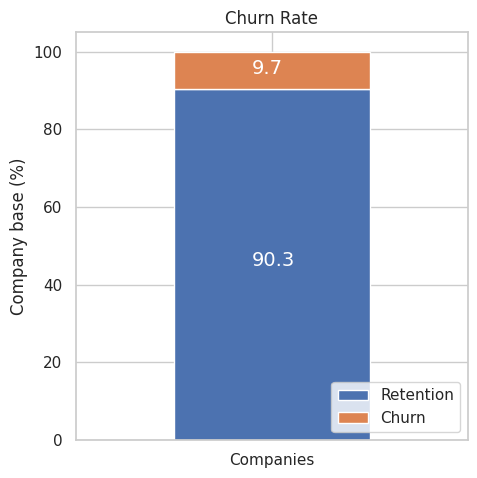

In [24]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churn Rate", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

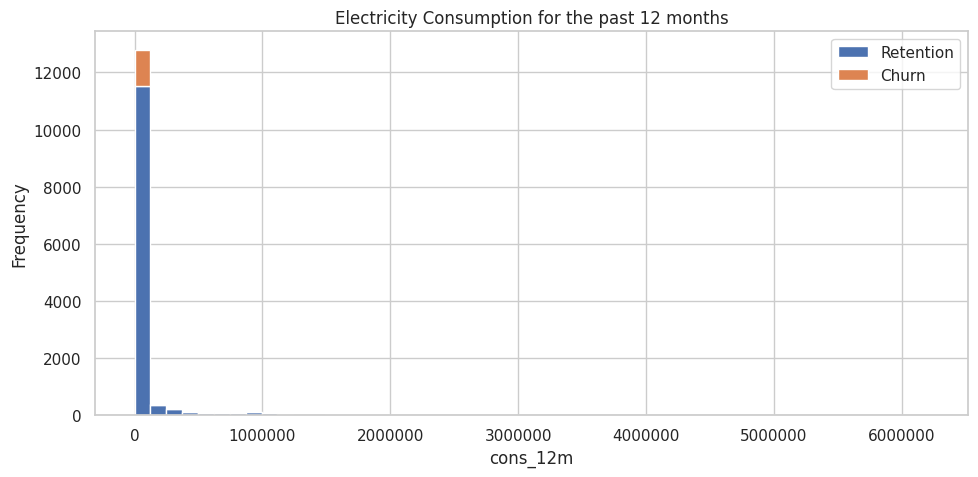

In [25]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(10, 5))

plt.title('Electricity Consumption for the past 12 months')
plot_distribution(consumption, 'cons_12m', axs)

### price_df Analysis

#### Checking for Skewness of features.

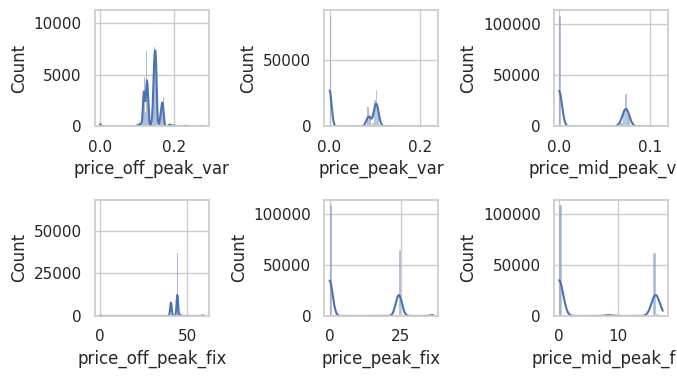

In [26]:
fig, axs = plt.subplots(2, 3)

sns.histplot(data=df, x="price_off_peak_var", kde=True, ax=axs[0, 0])
sns.histplot(data=df, x="price_peak_var", kde=True, ax=axs[0, 1])
sns.histplot(data=df, x="price_mid_peak_var", kde=True, ax=axs[0, 2])
sns.histplot(data=df, x="price_off_peak_fix", kde=True, ax=axs[1, 0])
sns.histplot(data=df, x="price_peak_fix", kde=True, ax=axs[1, 1])
sns.histplot(data=df, x="price_mid_peak_fix", kde=True, ax=axs[1, 2])

plt.show()

array([[<Axes: title={'center': 'price_off_peak_var'}>,
        <Axes: title={'center': 'price_peak_var'}>,
        <Axes: title={'center': 'price_mid_peak_var'}>],
       [<Axes: title={'center': 'price_off_peak_fix'}>,
        <Axes: title={'center': 'price_peak_fix'}>,
        <Axes: title={'center': 'price_mid_peak_fix'}>],
       [<Axes: title={'center': 'churn'}>, <Axes: >, <Axes: >]],
      dtype=object)

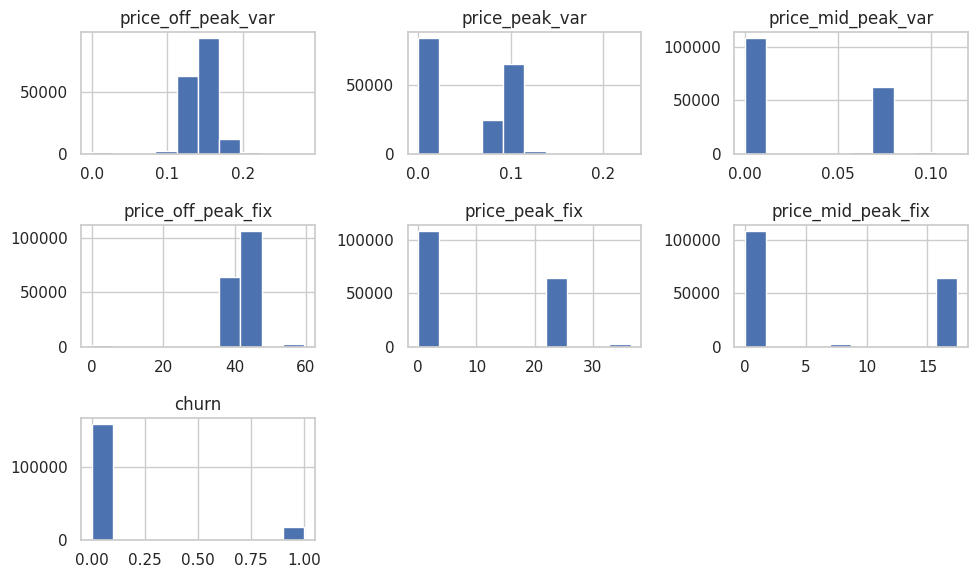

In [27]:
df.groupby(['id','price_date']).mean().hist(figsize=(10,6))


The data is skewed. This skewness has to be handled.

#### Energy and Power Analysis

In [28]:
#Spliting the dataset into chrun and non-churn price by price date
churn_grp = df[df['churn']==1].groupby(['price_date']).mean()
non_churn_grp = df[df['churn']==0].groupby('price_date').mean()

ENERGY PER MONTH

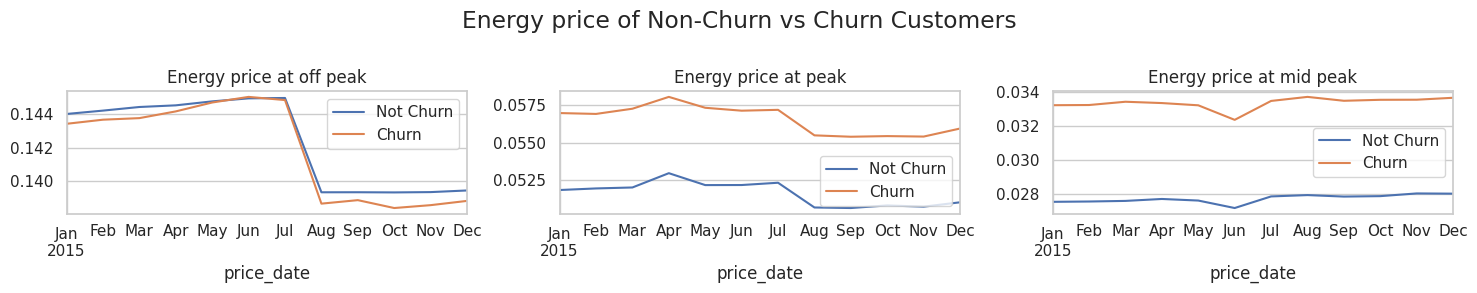

In [29]:
#Plotting average price of ENERGY by month 

plt.figure(figsize=(15,3))
plt.subplot(131)
non_churn_grp.price_off_peak_var.plot()
churn_grp.price_off_peak_var.plot()
plt.legend(['Not Churn','Churn'])
plt.title('Energy price at off peak')
plt.subplot(132)
non_churn_grp.price_peak_var.plot()
churn_grp.price_peak_var.plot()
plt.legend(['Not Churn','Churn'])
plt.title('Energy price at peak')
plt.subplot(133)
non_churn_grp.price_mid_peak_var.plot()
churn_grp.price_mid_peak_var.plot()
plt.legend(['Not Churn','Churn'])
plt.title('Energy price at mid peak')
plt.suptitle('Energy price of Non-Churn vs Churn Customers')
plt.subplots_adjust(top=0.8)
plt.show()

POWER PER MONTH

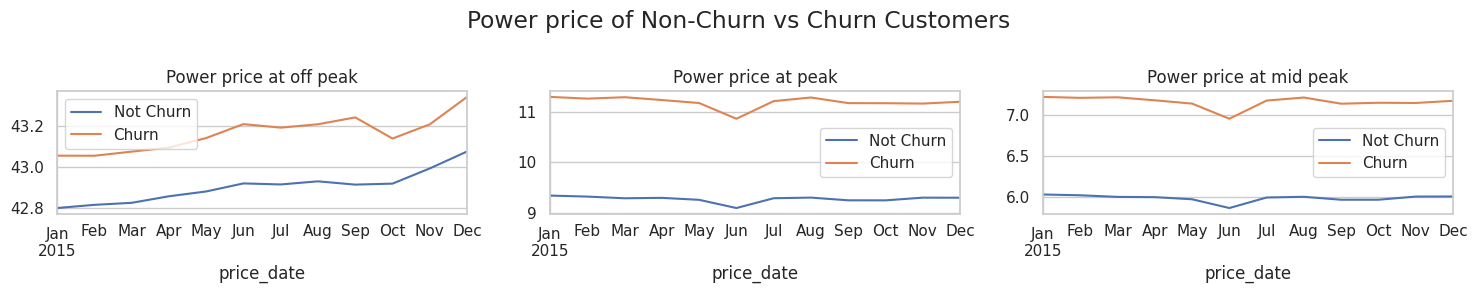

In [30]:
# Plotting average price of POWER by month

plt.figure(figsize=(15,3))
plt.subplot(131)
non_churn_grp.price_off_peak_fix.plot()
churn_grp.price_off_peak_fix.plot()
plt.legend(['Not Churn','Churn'])
plt.title('Power price at off peak')
plt.subplot(132)
non_churn_grp.price_peak_fix.plot()
churn_grp.price_peak_fix.plot()
plt.legend(['Not Churn','Churn'])
plt.title('Power price at peak')
plt.subplot(133)
non_churn_grp.price_mid_peak_fix.plot()
churn_grp.price_mid_peak_fix.plot()
plt.legend(['Not Churn','Churn'])
plt.title('Power price at mid peak')
plt.suptitle('Power price of Non-Churn vs Churn Customers')
plt.subplots_adjust(top=0.8)
plt.show()

The plots for Energy and Power between Churn and Not-Churn customers are similar except for the Energy and Power prices at_off_peak.

There is some variation of price between churn and un-churn clients. Churned clients have slightly low off-peak energy prices and high off-peak prices. But we can't confidently say this is the factor for churn. We need to analyze the data further to arrive at a concrete conclusion.

#### Correlation Heatmap

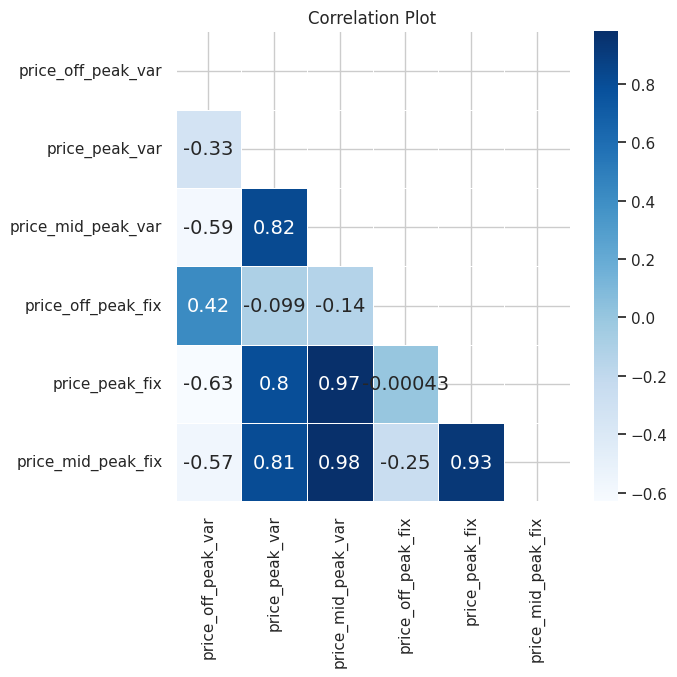

In [31]:
plt.figure(figsize=(7,7))
pd_corr = price_df.corr()
mask = np.triu(np.ones_like(pd_corr))
sns.heatmap(pd_corr,annot=True,cmap="Blues",linewidth=.5,mask=mask)
plt.title('Correlation Plot')
plt.show()

There is high correlation between price_mid_peak_fix and price_mid_peak_var, price_mid_peak_fix and price_peak_fix, and price_mid_peak_var and price_peak fix.

High co-relation coefficient values between two features denote the high dependency between them. It shows that the two features convey the same information. So one of the features can be dropped.

In [32]:
price_df.drop(['price_peak_var','price_peak_fix','price_mid_peak_var'],axis=1,inplace=True)

#### Feature Engineering for price_df

Our main intent is to combine price_df and client_df without irrelevant features. We cannot do it yet as price_df is in monthly format. So we can take the average of the monthly prices. The energy off-peak price was high at the beginning of the year and low at the end of the year. So we take the price difference as a consolidated value.

In [33]:
#Filtering out the January and December energy off peak price

price_off_peak_energy = price_df[['id','price_off_peak_var']]
jan_prices = price_off_peak_energy.groupby('id').price_off_peak_var.first().reset_index().rename(columns={'price_off_peak_var':'price_off_peak_var_jan'})
dec_prices = price_off_peak_energy.groupby('id').last().price_off_peak_var.reset_index().rename(columns={'price_off_peak_var':'price_off_peak_var_dec'})

In [34]:
price_df.drop('price_off_peak_var',axis=1,inplace=True)

#Taking average of Power off-peak and mid-peak

price_df = price_df.groupby('id').mean().reset_index()

In [35]:
#Calculating Energy off peak difference

price_df = price_df.merge(jan_prices,on='id').merge(dec_prices,on='id')
price_df['energy_off_peak_variation'] = price_df.price_off_peak_var_jan - price_df.price_off_peak_var_dec
price_df.drop(['price_off_peak_var_jan','price_off_peak_var_dec'],axis=1,inplace=True)

In [36]:
#Final price_df

price_df.head()

,id,price_off_peak_fix,price_mid_peak_fix,energy_off_peak_variation
0,0002203ffbb812588b632b9e628cc38d,40.701732,16.280694,0.006192
1,0004351ebdd665e6ee664792efc4fd13,44.385450,0.000000,0.004104
2,0010bcc39e42b3c2131ed2ce55246e3c,45.319710,0.000000,-0.050443
3,0010ee3855fdea87602a5b7aba8e42de,40.647427,16.258971,0.010018
4,00114d74e963e47177db89bc70108537,44.266930,0.000000,0.003994


### Client_df Analysis

In [37]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [38]:
#Changing datatypes

client_df = client_df.astype({
    'date_activ' : 'datetime64',
    'date_end' : 'datetime64',
    'date_modif_prod' : 'datetime64',
    'date_renewal' : 'datetime64',
})

The entries in the client_df dataframe are not convienient to operate with.

Hence, let us remap these entries to improve convenience.

In [39]:
#Changing hashed values to meaningful labels for easy understanding.

print('Unique Sales Channels : \n',client_df.channel_sales.unique())
print('\nUnique Origin Campaign : \n',client_df.origin_up.unique())

Unique Sales Channels : 
 ['foosdfpfkusacimwkcsosbicdxkicaua' 'MISSING'
 'lmkebamcaaclubfxadlmueccxoimlema' 'usilxuppasemubllopkaafesmlibmsdf'
 'ewpakwlliwisiwduibdlfmalxowmwpci' 'epumfxlbckeskwekxbiuasklxalciiuu'
 'sddiedcslfslkckwlfkdpoeeailfpeds' 'fixdbufsefwooaasfcxdxadsiekoceaa']

Unique Origin Campaign : 
 ['lxidpiddsbxsbosboudacockeimpuepw' 'kamkkxfxxuwbdslkwifmmcsiusiuosws'
 'ldkssxwpmemidmecebumciepifcamkci' 'MISSING'
 'usapbepcfoloekilkwsdiboslwaxobdp' 'ewxeelcelemmiwuafmddpobolfuxioce']


Now let us map the above unique entries.

In [40]:
# Mapping entries

channel_mask = {
    'MISSING':'missing_data',
    'foosdfpfkusacimwkcsosbicdxkicaua':'channel_1',
    'lmkebamcaaclubfxadlmueccxoimlema':'channel_2',
    'usilxuppasemubllopkaafesmlibmsdf':'channel_3',
    'ewpakwlliwisiwduibdlfmalxowmwpci':'channel_4',
    'epumfxlbckeskwekxbiuasklxalciiuu':'channel_5',
    'sddiedcslfslkckwlfkdpoeeailfpeds':'channel_6',
    'fixdbufsefwooaasfcxdxadsiekoceaa':'channel_7',
}
origin_mask = {
    'lxidpiddsbxsbosboudacockeimpuepw' : 'origin_1',
    'kamkkxfxxuwbdslkwifmmcsiusiuosws' : 'origin_2',
    'ldkssxwpmemidmecebumciepifcamkci' : 'origin_3',
    'usapbepcfoloekilkwsdiboslwaxobdp' : 'origin_4',
    'ewxeelcelemmiwuafmddpobolfuxioce' : 'origin_5',
    'MISSING' : 'origin_missing'
}
client_df.replace({
    'has_gas' : {
        't':1,'f':0
    },
    'channel_sales':channel_mask,
    'origin_up':origin_mask,
},inplace=True)

In [41]:
# Creating two new variables (in years)

# contract_modification_interval : no of years in which the client last modified their contract.
# contract_interval : no of years client used our services.

client_df['contract_modification_interval'] = client_df.date_modif_prod.dt.year - client_df.date_activ.dt.year
client_df['contract_interval'] = client_df.date_end.dt.year - client_df.date_activ.dt.year

In [42]:
# Final client_df dataframe

client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_modification_interval,contract_interval
0,24011ae4ebbe3035111d65fa7c15bc57,channel_1,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,25.44,25.44,2,678.99,3,origin_1,43.648,1,2,3
1,d29c2c54acc38ff3c0614d0a653813dd,missing_data,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,16.38,16.38,1,18.89,6,origin_2,13.800,0,0,7
2,764c75f661154dac3a6c254cd082ea7d,channel_1,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,28.60,28.60,1,6.60,6,origin_2,13.856,0,0,6
3,bba03439a292a1e166f80264c16191cb,channel_2,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,30.22,30.22,1,25.46,6,origin_2,13.200,0,0,6
4,149d57cf92fc41cf94415803a877cb4b,missing_data,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,44.91,44.91,1,47.98,6,origin_2,19.800,0,0,6


### Merging Client_df and Price_df

In [43]:
df = client_df.merge(price_df,on='id')
print('Total No of Clients in Price Dataset : ',price_df.id.nunique(),
      '\nTotal No of Clients in Client Dataset : ',client_df.id.nunique(),
      '\nTotal No of Clients after merging : ',df.id.nunique())

Total No of Clients in Price Dataset :  16096 
Total No of Clients in Client Dataset :  14606 
Total No of Clients after merging :  14606


Merging successful.

There is no client data mapped for 1490 clients.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14606 entries, 0 to 14605
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

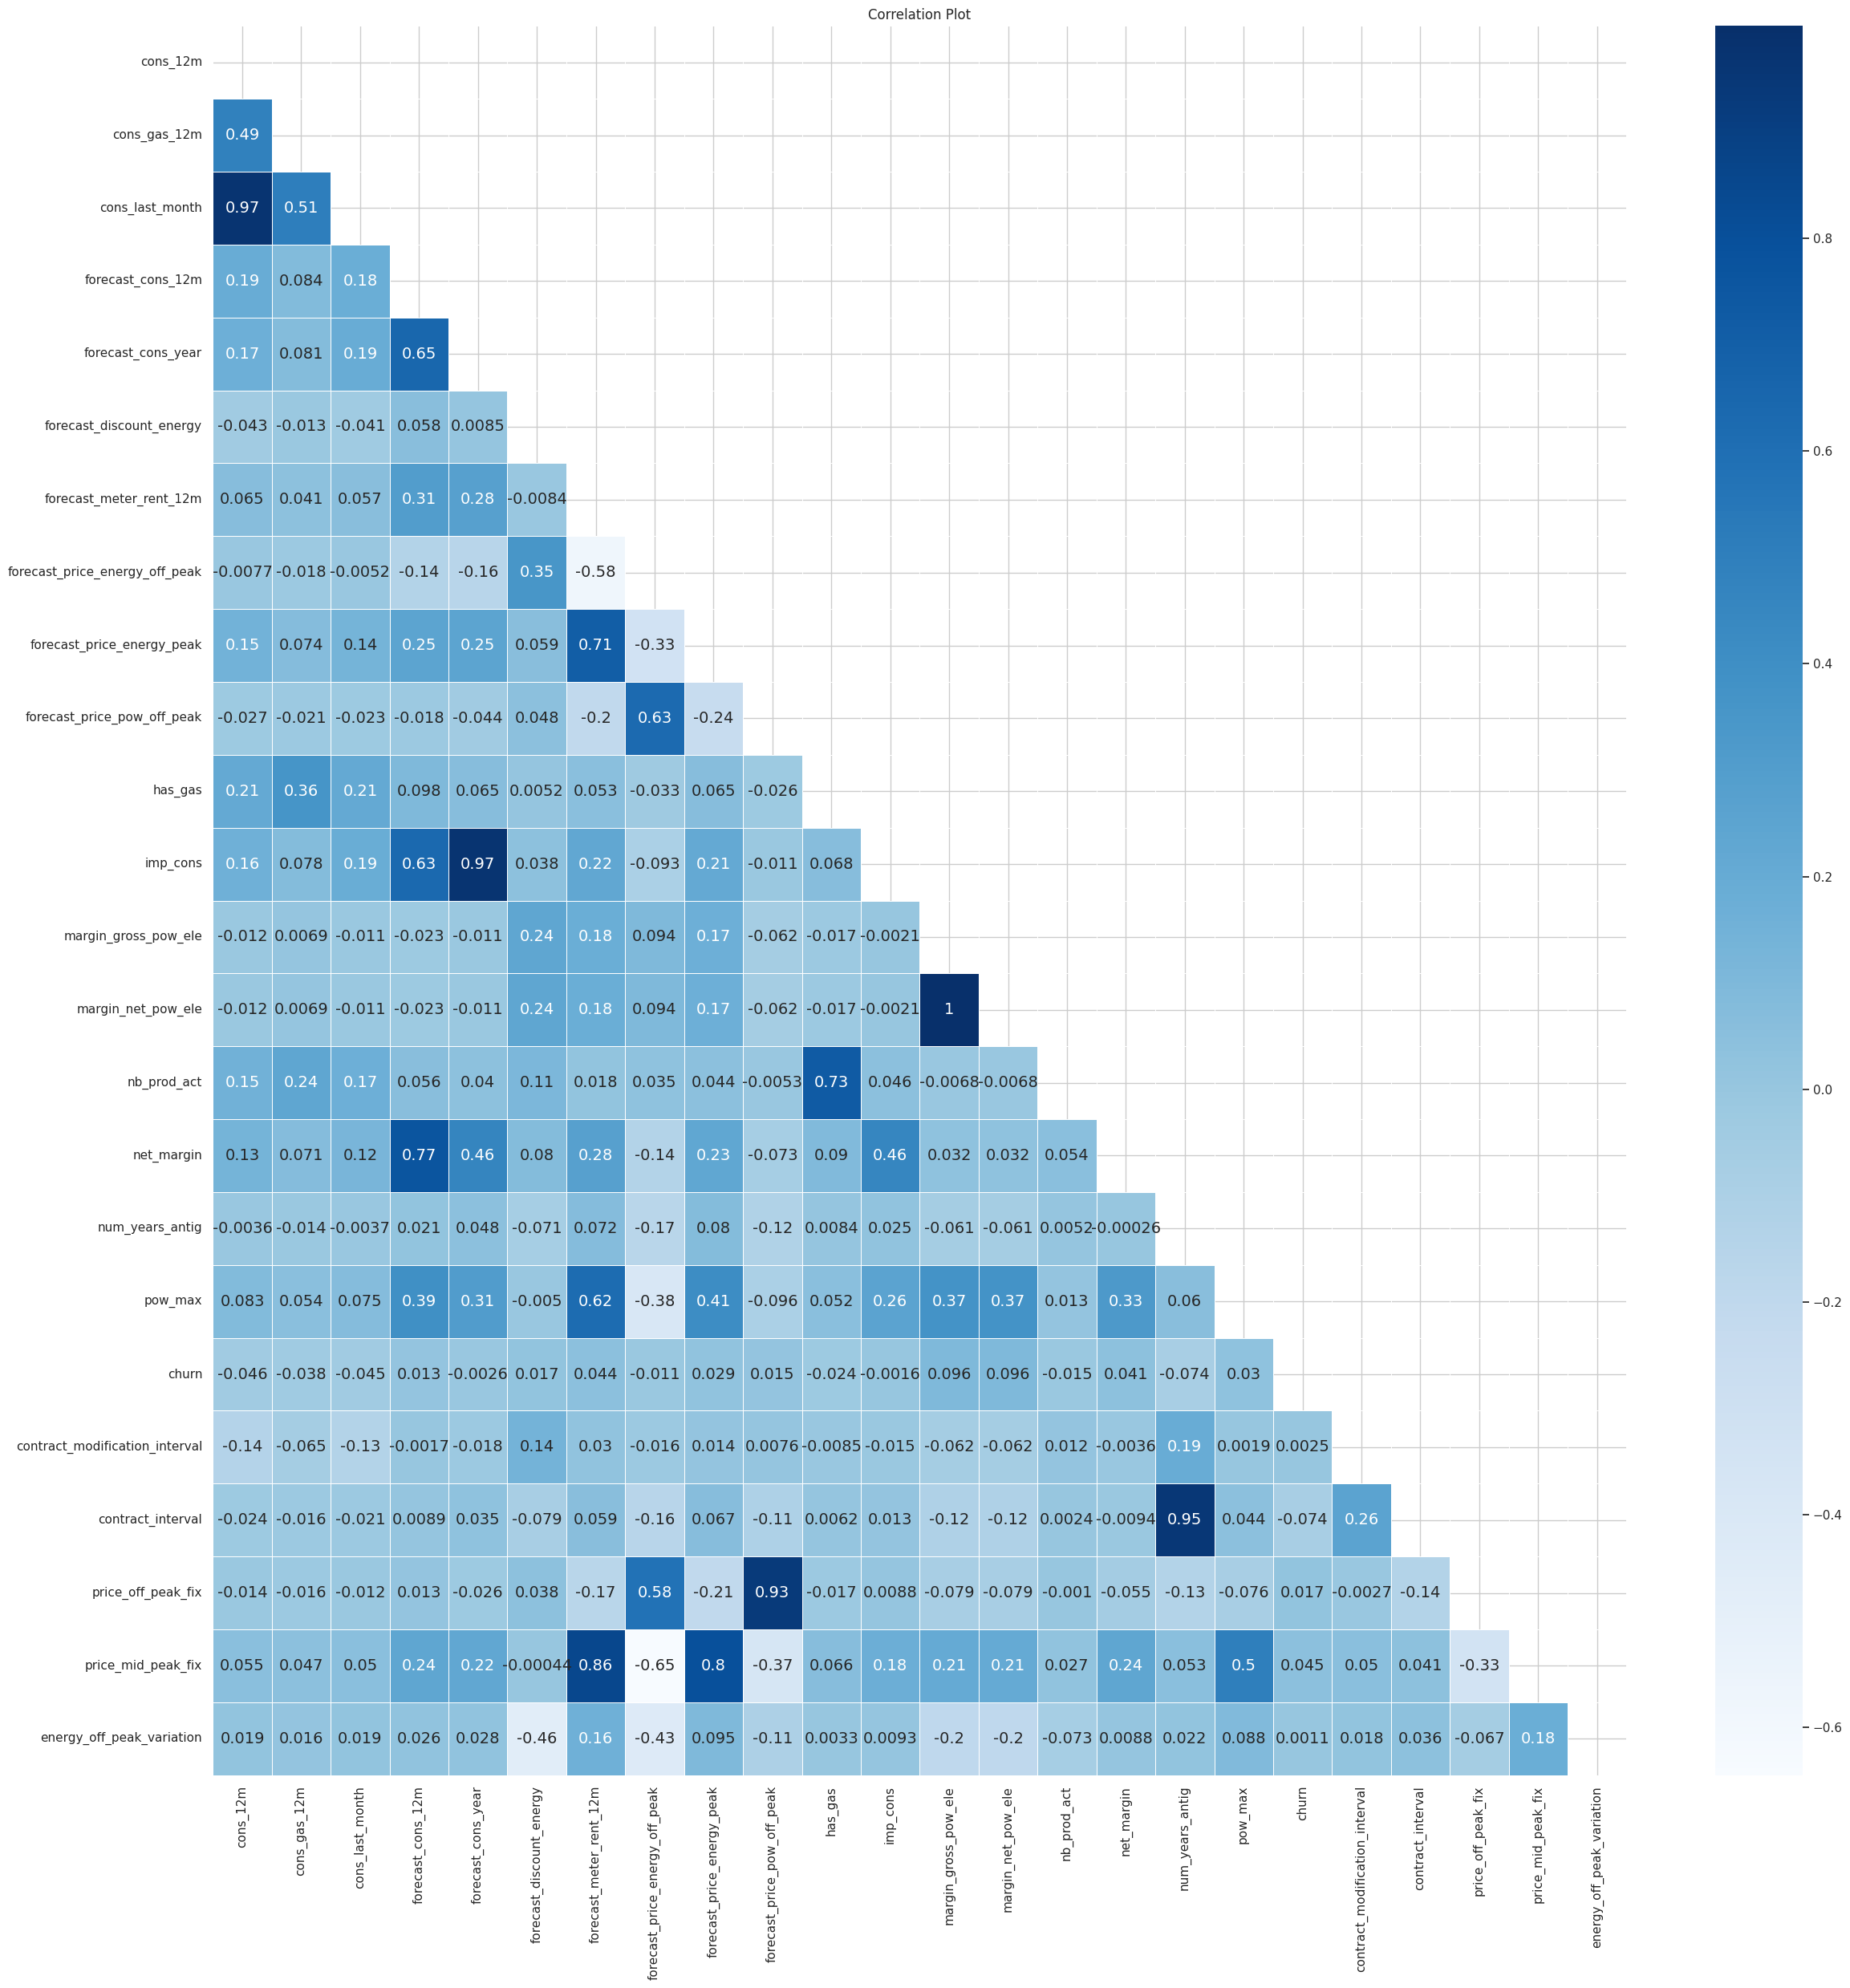

In [45]:
# Checking for correlation 

plt.figure(figsize=(25,25))
df_corr = df.corr()
mask = np.triu(np.ones_like(df_corr))
sns.heatmap(df_corr,annot=True,cmap="Blues",linewidth=.5,mask=mask)
plt.title('Correlation Plot')
plt.show()

In [46]:
# Dropping highly correlated features along with some unwanted/irrelevant features

df.drop([
    #Highly correlated columns
    'cons_last_month','forecast_cons_12m', 'forecast_cons_year','forecast_meter_rent_12m',
    'forecast_meter_rent_12m', 'forecast_price_energy_off_peak','forecast_price_energy_peak', 
    'forecast_price_pow_off_peak','margin_gross_pow_ele', 'nb_prod_act',
    'num_years_antig',
    #Unwanted Columns
    'id','date_activ','date_end','date_renewal','date_modif_prod',
],axis=1,inplace=True)

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.000000,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.000000,0.000000,0.000000,0.000000,4.154590e+06
forecast_discount_energy,14606.0,0.966726,5.108289,0.000000,0.000000,0.000000,0.000000,3.000000e+01
has_gas,14606.0,0.181501,0.385446,0.000000,0.000000,0.000000,0.000000,1.000000e+00
imp_cons,14606.0,152.786896,341.369366,0.000000,0.000000,37.395000,193.980000,1.504279e+04
margin_net_pow_ele,14606.0,24.562517,20.230280,0.000000,14.280000,21.640000,29.880000,3.746400e+02
net_margin,14606.0,189.264522,311.798130,0.000000,50.712500,112.530000,243.097500,2.457065e+04
pow_max,14606.0,18.135136,13.534743,3.300000,12.500000,13.856000,19.172500,3.200000e+02
churn,14606.0,0.097152,0.296175,0.000000,0.000000,0.000000,0.000000,1.000000e+00
contract_modification_interval,14606.0,1.890251,2.298371,0.000000,0.000000,0.000000,4.000000,1.200000e+01


In [48]:
# Checking for Duplicate Records

df[df.duplicated(subset=['cons_12m',
       'imp_cons', 'net_margin',
       'pow_max', 'churn', 'price_off_peak_fix', 'price_mid_peak_fix',
       'energy_off_peak_variation'])]

,channel_sales,cons_12m,cons_gas_12m,forecast_discount_energy,has_gas,imp_cons,margin_net_pow_ele,net_margin,origin_up,pow_max,churn,contract_modification_interval,contract_interval,price_off_peak_fix,price_mid_peak_fix,energy_off_peak_variation
759,missing_data,0,0,0.0,0,0.0,0.12,0.0,origin_3,95.0,0,0,8,59.173468,8.367731,0.005795
1660,missing_data,0,24908,0.0,1,0.0,0.12,0.0,origin_3,60.0,0,0,8,59.173468,8.367731,0.005795
6735,missing_data,0,0,0.0,0,0.0,0.12,0.0,origin_3,60.0,0,0,8,59.173468,8.367731,0.005795
6806,missing_data,0,0,0.0,0,0.0,0.00,0.0,origin_3,9.9,0,0,8,59.173468,8.367731,0.005795
6959,missing_data,0,0,0.0,0,0.0,0.12,0.0,origin_3,80.0,0,0,8,59.173468,8.367731,0.005795
8195,missing_data,0,0,0.0,0,0.0,0.12,0.0,origin_3,60.0,0,5,7,59.173468,8.367731,0.005795
10316,missing_data,0,0,0.0,0,0.0,0.12,0.0,origin_3,40.0,0,0,8,59.173468,8.367731,0.005795
10597,missing_data,0,0,0.0,0,0.0,0.00,0.0,origin_3,30.0,0,0,8,59.173468,8.367731,0.005795
11470,missing_data,0,0,0.0,0,0.0,0.12,0.0,origin_3,35.0,0,0,7,59.173468,8.367731,0.005795
11713,missing_data,0,0,0.0,0,0.0,0.12,0.0,origin_3,80.0,0,0,7,59.173468,8.367731,0.005795


In [49]:
# Drop duplicates

df.drop_duplicates(subset=['cons_12m',
       'imp_cons', 'net_margin',
       'pow_max', 'churn', 'price_off_peak_fix', 'price_mid_peak_fix',
       'energy_off_peak_variation'],ignore_index=True,inplace=True)

In [50]:
df.columns

Index(['channel_sales', 'cons_12m', 'cons_gas_12m', 'forecast_discount_energy',
       'has_gas', 'imp_cons', 'margin_net_pow_ele', 'net_margin', 'origin_up',
       'pow_max', 'churn', 'contract_modification_interval',
       'contract_interval', 'price_off_peak_fix', 'price_mid_peak_fix',
       'energy_off_peak_variation'],
      dtype='object')

### Visualization

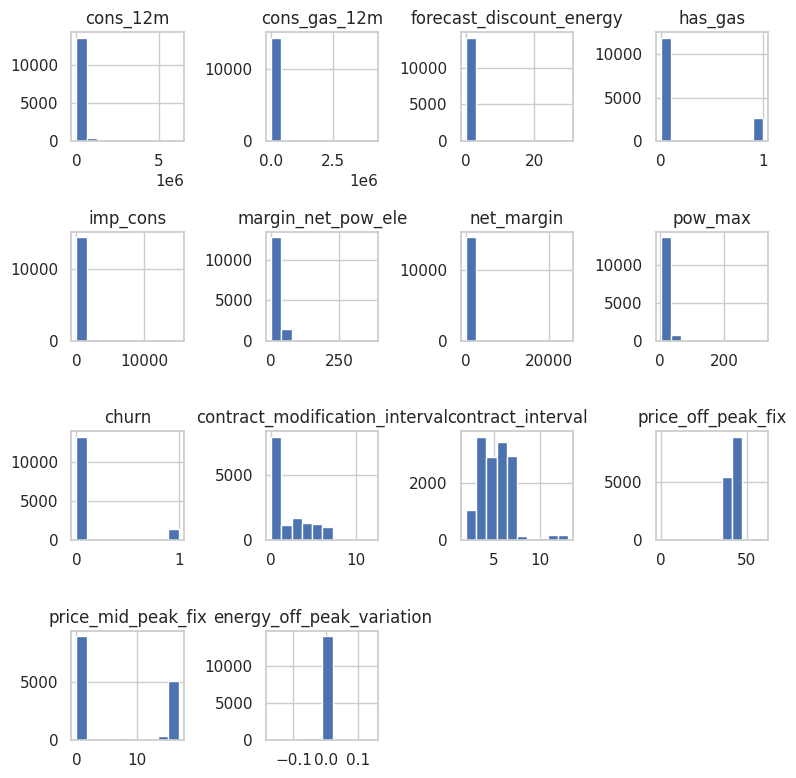

In [51]:
# Univariate Analysis
df.hist(figsize=(8,8))
plt.show()

---

## Is Price Sensitivity correlated with churn?

Let us explore

Normally, price sensitivity, or elasticity, is calculated as the percent change in quantity over percent change in price. 

Since we cannot compute quantity over time, we will define price sensitivity as the cutoff where k represents a scalar for easier interpretability.

In [72]:
# Reading the datasets again

client_df = pd.read_csv("/content/drive/MyDrive/PowerCo_Forage/client_data.csv")
price_df = pd.read_csv("/content/drive/MyDrive/PowerCo_Forage/price_data.csv")

In [73]:
energy_data = pd.merge(client_df, price_df, on='id')

In [75]:
# Compute average energy and power price for all periods
energy_data['price_var'] = energy_data[['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var']].mean(axis=1)
energy_data['price_fix'] = energy_data[['price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']].mean(axis=1)

# Compute total consumption
energy_data['total_cons'] = energy_data[['cons_12m', 'cons_gas_12m']].sum(axis=1)

In [76]:
energy_data[['cons_12m', 'cons_gas_12m', 'total_cons']].iloc[200:203]

,cons_12m,cons_gas_12m,total_cons
200,786536,80583,867119
201,786536,80583,867119
202,786536,80583,867119


In [77]:
price_analysis = energy_data.groupby(['id', 'price_date']).agg(
    total_cons = ('total_cons', 'mean'),
    avg_price_var = ('price_var', 'mean'),
    avg_price_fix = ('price_fix', 'mean'),
    ).reset_index()

# Multiply average prices with scalar
price_analysis['avg_price_var_scaled'] = price_analysis['avg_price_var'].mul(100_000)
price_analysis['avg_price_fix_scaled'] = price_analysis['avg_price_fix'].mul(100_000)

In [78]:
# Compute price sensitivities and divide by scalar
price_analysis['price_sens_var'] = price_analysis['total_cons'].div(price_analysis['avg_price_var_scaled'])
price_analysis['price_sens_fix'] = price_analysis['total_cons'].div(price_analysis['avg_price_fix_scaled'])

In [79]:
# Drop rows where price is 0
price_analysis_clean = price_analysis[(price_analysis['avg_price_var'] != 0) & (price_analysis['avg_price_fix'] != 0)]
price_analysis_clean.describe()

,total_cons,avg_price_var,avg_price_fix,avg_price_var_scaled,avg_price_fix_scaled,price_sens_var,price_sens_fix
count,1.738180e+05,173818.000000,173818.000000,173818.000000,1.738180e+05,173818.000000,173818.000000
mean,1.883994e+05,0.074779,19.642296,7477.933974,1.964230e+06,23.811564,0.099456
std,6.701382e+05,0.024311,6.172197,2431.079401,6.172197e+05,86.129076,0.369984
min,0.000000e+00,0.022727,4.980000,2272.733333,4.980000e+05,0.000000,0.000000
25%,6.183000e+03,0.049811,14.755644,4981.133333,1.475564e+06,0.937899,0.003608
50%,1.634100e+04,0.083681,14.814903,8368.133333,1.481490e+06,2.341163,0.008800
75%,5.128200e+04,0.099014,27.043980,9901.366667,2.704398e+06,6.722017,0.024414
max,6.799539e+06,0.163193,34.677296,16319.300000,3.467730e+06,1480.574633,4.589661


In [80]:
# Merge churn values
price_analysis_clean = price_analysis_clean.merge(energy_data[['id', 'price_date', 'churn']], on=['id', 'price_date'])
price_analysis_clean.head()

,id,price_date,total_cons,avg_price_var,avg_price_fix,avg_price_var_scaled,avg_price_fix_scaled,price_sens_var,price_sens_fix,churn
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,22034.0,0.100102,27.04398,10010.166667,2704397.96,2.201162,0.008147,0
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,22034.0,0.100102,27.04398,10010.166667,2704397.96,2.201162,0.008147,0
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,22034.0,0.102561,27.15259,10256.066667,2715259.00,2.148387,0.008115,0
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,22034.0,0.102561,27.15259,10256.066667,2715259.00,2.148387,0.008115,0
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,22034.0,0.102561,27.15259,10256.066667,2715259.00,2.148387,0.008115,0


In [81]:
# Separate retained and churned clients for plotting
price_churn_analysis_0 = price_analysis_clean.query('churn == 0')
price_churn_analysis_1 = price_analysis_clean.query('churn == 1')

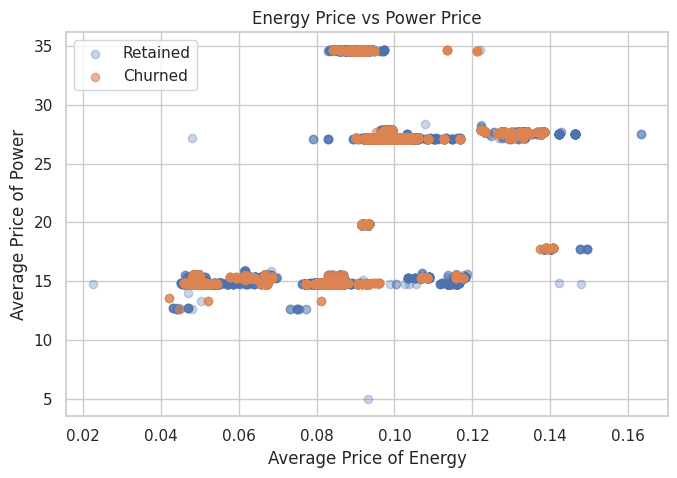

In [83]:
# Plot to observe the energy price and power price

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

ax.scatter(price_churn_analysis_0['avg_price_var'], price_churn_analysis_0['avg_price_fix'], label='Retained', alpha=0.3)
ax.scatter(price_churn_analysis_1['avg_price_var'], price_churn_analysis_1['avg_price_fix'], label='Churned', alpha=0.6)

plt.xlabel('Average Price of Energy')
plt.ylabel('Average Price of Power')
plt.title('Energy Price vs Power Price')
plt.legend(loc='upper left')
plt.show()

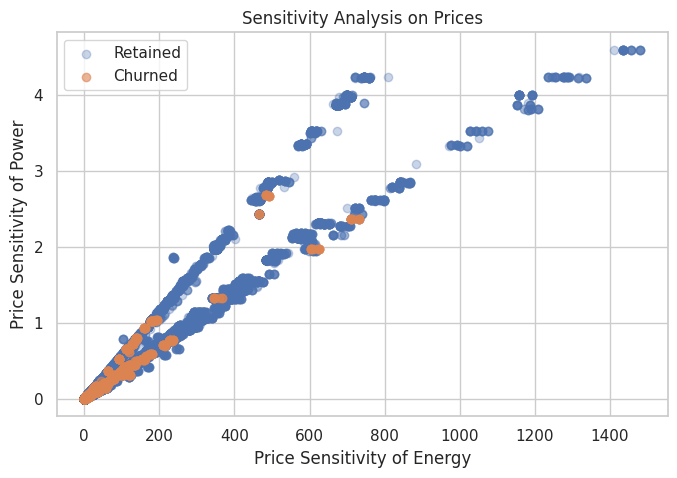

In [85]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

ax.scatter(price_churn_analysis_0['price_sens_var'], price_churn_analysis_0['price_sens_fix'], label='Retained', alpha=0.3)
ax.scatter(price_churn_analysis_1['price_sens_var'], price_churn_analysis_1['price_sens_fix'], label='Churned', alpha=0.6)

plt.xlabel('Price Sensitivity of Energy')
plt.ylabel('Price Sensitivity of Power')
plt.title('Sensitivity Analysis on Prices')
plt.legend(loc='upper left')
plt.show()

## Hypothesis Testing

Our Null Hypothesis statement is:

Null Hypothesis : Changes in price have a significant impact on customer churn, particularly in the SME segment of the gas and electricity market in Europe.

<br>


Hence, our Alternative hypothesis states that:

Alternative Hypothesis : Changes in price have no significant impact on customer churn, particularly in the SME segment of gas and electricity market in Europe.

<br>

Now, let us perform hypothesis testing to verify the same.

In [66]:
# Importing ttest_ind library
from scipy.stats import ttest_ind


# Define the null hypothesis: changes in price do not significantly impact customer churn
null_hypothesis = 'Changes in price do not significantly impact customer churn'

# Define the alternative hypothesis: changes in price significantly impact customer churn
alternative_hypothesis = 'Changes in price significantly impact customer churn'


# Define the significance level
significance_level = 0.05

# Split the dataframe into two groups based on churn status
churn_yes = df[df['churn'] == 1]['net_margin']
churn_no = df[df['churn'] == 0]['net_margin']

# Perform a two-sample t-test on the two groups
t_stat, p_value = ttest_ind(churn_yes, churn_no)

# Determine whether to reject or fail to reject the null hypothesis based on the p-value
if p_value < significance_level:
    print(f'{alternative_hypothesis} (p-value = {p_value:.4f})')
else:
    print(f'{null_hypothesis} (p-value = {p_value:.4f})')

Changes in price significantly impact customer churn (p-value = 0.0000)


From the above test, we can observe that we fail to reject the Null Hypothesis since the p-value is less than the significance level.

---
## Key Findings:

From the intense EDA performed above, we can observe the following insights:



*   Overall, about 9.7% of the customers of PowerCo are churn customers.

*   The provided dataset doesn't allow us to use the actual formula to compute client price sensitivity.

*   We were not able to determine whether or not price sensitivity and churn are correlated with the current data. 

*   If PowerCo has panel data for their clients, it would be possible to compute the average client price sensitivity utilizing the real formula.

*   More clients seem to churn as a result of increases in the price of energy rather than power. In other words, PowerCo could likely get away with increasing power prices without any losing any clients.

*   Customers who churned have lower electricity and gas consumption levels than non-churners, except consumption is about even if the client does not use gas.

*   Customers who have a higher net margin seem to churn more. Perhaps customers are more inclined to churn if their net margin on power subscription is higher than the non-churner average? Whether or not the client uses gas does not differentiate the groups by much in this case.

*   There doesn't seem to be much of a difference when comparing number of antiquity and churn.

*   We can see that subscribed power and total net margin seems to be an influencial factor for churn, with the former being slightly stronger.

Finally, from the Hypothesis test, we fail to reject the Null Hypothesis. 

**Null Hypothesis**: Changes in price have a significant impact on customer churn, particularly in the SME segment of the gas and electricity market in Europe.

**Alternative Hypothesis**: Changes in price have no significant impact on customer churn, particularly in the SME segment of gas and electricity market in Europe.


Hence, there is a fair possibility that our NULL HYPOTHESIS is true.